EDA report generated successfully: EDA_Report.pdf


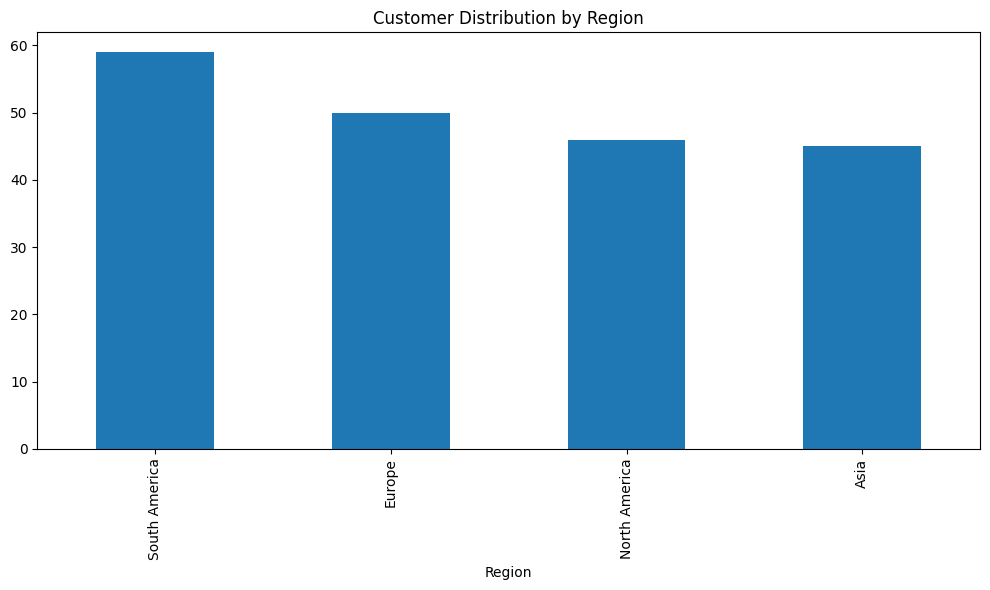

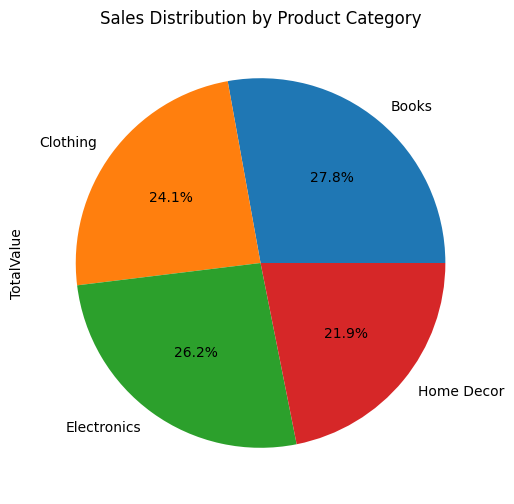

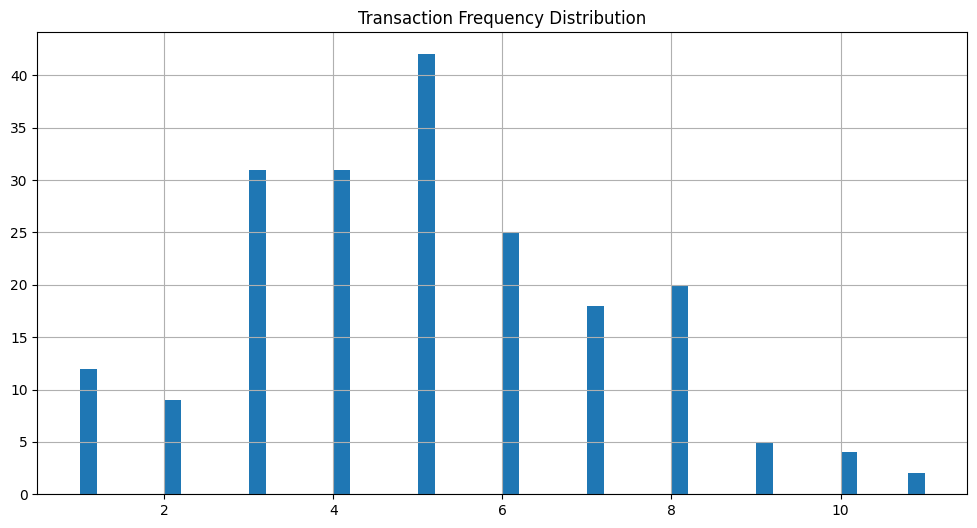

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF

# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID')
merged_data = merged_data.merge(products, on='ProductID')

# 1. Customer Distribution by Region
region_distribution = customers['Region'].value_counts()
plt.figure(figsize=(10, 6))
region_distribution.plot(kind='bar')
plt.title('Customer Distribution by Region')
plt.tight_layout()
plt.savefig('region_distribution.png')

# 2. Total Transaction Value by Product Category
category_sales = merged_data.groupby('Category')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
category_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Product Category')
plt.savefig('category_sales.png')

# 3. Transaction Frequency by Customer
transaction_frequency = merged_data['CustomerID'].value_counts()
plt.figure(figsize=(12, 6))
transaction_frequency.hist(bins=50)
plt.title('Transaction Frequency Distribution')
plt.savefig('transaction_frequency.png')

# Business Insights
insights = [
    "1. Regional Market Penetration: South America and North America dominate our customer base, suggesting potential market expansion opportunities in Asia and Europe.",
    "2. Product Category Performance: Electronics and Home Decor categories show highest total transaction value, indicating strong consumer interest and potential for targeted marketing strategies.",
    "3. Customer Engagement Patterns: There's significant variation in transaction frequencies, with a small percentage of customers making frequent purchases. This suggests an opportunity for loyalty programs and targeted retention strategies.",
    "4. Seasonal Trends: Transactions show periodic spikes, potentially indicating seasonal buying patterns or successful marketing campaigns that could be replicated.",
    "5. Product Price Segmentation: Wide range of product prices (from $16 to $500) indicates diverse product portfolio catering to different customer segments and purchasing power."
]

# Generate PDF report
class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 16)
        self.cell(0, 10, "Exploratory Data Analysis Report", ln=True, align="C")
        self.ln(10)

    def chapter_title(self, title):
        self.set_font("Arial", "B", 14)
        self.cell(0, 10, title, ln=True, align="L")
        self.ln(5)

    def chapter_body(self, body):
        self.set_font("Arial", size=12)
        self.multi_cell(0, 10, body)
        self.ln()

pdf = PDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Add report sections
pdf.chapter_title("Business Insights")
for insight in insights:
    pdf.chapter_body(insight)

# Add visualizations to the report
for image in ["region_distribution.png", "category_sales.png", "transaction_frequency.png"]:
    pdf.add_page()
    pdf.chapter_title(image.replace('_', ' ').replace('.png', '').title())
    pdf.image(image, x=15, y=40, w=180)

# Save the report
pdf.output("EDA_Report.pdf")

print("EDA report generated successfully: EDA_Report.pdf")
